In [23]:
import lmfit, os
import numpy as np
import pandas as pd
from astropy import units
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.optimize import least_squares
from astropy.timeseries import LombScargle
from lightkurve.lightcurve import LightCurve as LC

from scripts import *

plt.rcParams['font.size'] = 15

In [ ]:
datadir = '/Users/arcticfox/Documents/GitHub/ri-exoplanet-detection/datasets'
dat = np.loadtxt(os.path.join(datadir, '51Pegb.txt'),  skiprows=1)

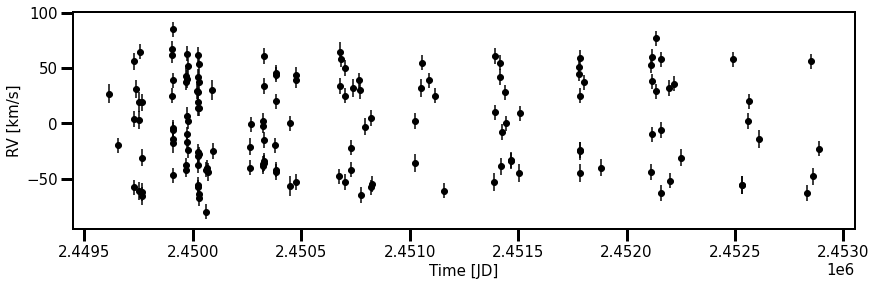

In [22]:
plt.figure(figsize=(14,4))
plt.errorbar(rvs.df['Time'], rvs.df['Vel'], yerr=rvs.df['Err'],
             marker='o', linestyle='', c='k')
plt.xlabel('Time [JD]')
plt.ylabel('RV [km/s]');

In [20]:
rvs = RV_Detection(dat[:,0], dat[:,1], dat[:,2])

In [28]:
rvs.build_confidence_set(minperiod=1.5, maxperiod=20.0)

  0%|          | 0/7 [00:00<?, ?it/s]/Users/arcticfox/Documents/GitHub/rvs-by-ri/scripts/main.py:407: RuntimeWarning: Mean of empty slice
  np.nanmean(S_null[S_null >= sobs]),
/Users/arcticfox/Documents/GitHub/rvs-by-ri/scripts/main.py:408: RuntimeWarning: Mean of empty slice
  np.nanmean(S_null[S_null == sobs])])
100%|██████████| 7/7 [00:51<00:00,  7.35s/it]


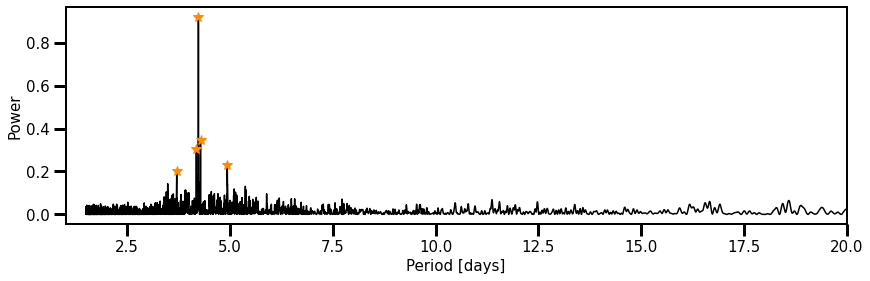

In [29]:
plt.figure(figsize=(14,4))
plt.plot(1.0/rvs.LS_results[0], rvs.LS_results[1], 'k')
_, peak_inds = rvs.get_candidate_periods()
plt.plot(1.0/rvs.LS_results[0][peak_inds], 
         rvs.LS_results[1][peak_inds], 'darkorange', marker='*', ms=10, linestyle='')
plt.xlim(1,20)
plt.xlabel('Period [days]')
plt.ylabel('Power');

In [42]:
# columns = theta, S_null <= sobs, S_null >= sobs, S_null = sobs
rvs.pvals_m

array([[4.93252915e+00, 5.47941554e-01,            nan,            nan],
       [4.28184345e+00, 4.58836445e-01,            nan,            nan],
       [4.23850929e+00, 6.14540464e-01,            nan,            nan],
       [4.23073436e+00, 0.00000000e+00, 8.98123284e-04, 0.00000000e+00],
       [4.22320571e+00, 5.85374235e-01,            nan,            nan],
       [4.18115122e+00, 4.90402297e-01,            nan,            nan],
       [3.70318024e+00, 5.73197660e-01,            nan,            nan]])

In [36]:
rvs.cset ## This still isn't working for some reason

array([], dtype=float64)

In [31]:
rvs.peak_period

4.230734357127434

In [32]:
lk = LC(rvs.df['Time'], rvs.df['Vel'], flux_err=rvs.df['Err'])
folded = lk.fold(period=rvs.peak_period)

//anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:202: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  LightkurveDeprecationWarning,


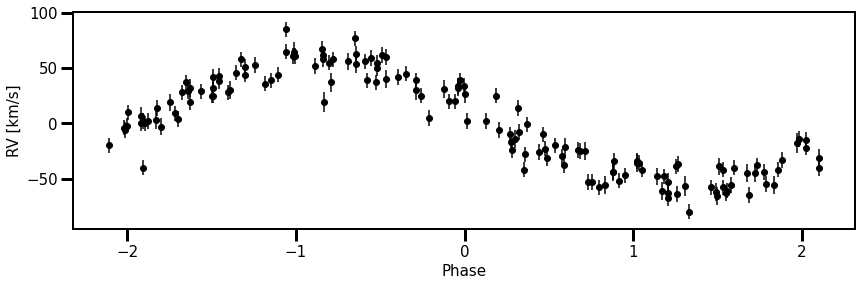

In [35]:
plt.figure(figsize=(14,4))
plt.errorbar(folded.time.value, folded.flux, yerr=folded.flux_err,
             marker='o', c='k', linestyle='')
plt.xlabel('Phase')
plt.ylabel('RV [km/s]');

In [37]:
rvs.test_period_theta0(theta0=4.1)

In [41]:
rvs.S_null, rvs.sobs

(array([0.68328648, 0.70508502, 0.69240176, 0.67773083, 0.67508937,
        0.71513874, 0.69509979, 0.68237254, 0.73214183, 0.7122338 ,
        0.67239094, 0.70313272, 0.66887111, 0.69840995, 0.66183264,
        0.67336876, 0.69311238, 0.66569079, 0.67808701, 0.70203137,
        0.69468789, 0.67983202, 0.66507138, 0.70349986, 0.65530518,
        0.67863948, 0.7080261 , 0.66837521, 0.71814643, 0.69042639,
        0.68434366, 0.68117942, 0.69230141, 0.66716518, 0.69052129,
        0.68645233, 0.70086302, 0.69135599, 0.68521885, 0.66828799,
        0.72464946, 0.70987276, 0.68756567, 0.72453027, 0.71677243,
        0.69242684, 0.71870524, 0.72872999, 0.65220723, 0.66648234,
        0.66853361, 0.71969925, 0.69903127, 0.70284274, 0.67689555,
        0.71459847, 0.65120466, 0.69228065, 0.68033895, 0.65298781,
        0.64653555, 0.71341456, 0.71487056, 0.7367701 , 0.68142869,
        0.69295222, 0.68326092, 0.73239116, 0.68684102, 0.64206797,
        0.66330403, 0.65965148, 0.67981263, 0.65